# <center>  Irrigation control system (with ESP32 and Thingspeak)

<center> Irrigation control system using an ESP32, <br> measure the weight of the pot with a plant,<br> monitoring the soil  muisture and store data online <h4> Most importanat: irrigate automaticly when plant needs (no more killing plants in my house)

### <center>  Do you want this too? follow this guide. 

<center> we are Shani and Nir <img src="https://i.pinimg.com/originals/38/d6/04/38d604baa084bd18baa9c744201fc4b4.jpg" width="100"/>



# The purpose of this course was to leard how to build "low cost" independce irrigation which is fully monitored (scale, EC, soil temp,volume water content).
During this project we research how to build,weld and program ESP/Arduino Component in order to execute the project. 

## Tools and Materials

How to start?
First gather all the required materials (you can get them on the web cheap..)

### The following tools and materials were used in this project:


__* ESP32__ 
[buy link](https://www.aliexpress.com/w/wholesale-esp32.html) or [link](https://www.dfrobot.com/product-1634.html?tracking=59c41226a118c)<br>
it's really easy to use and program using Arduino IDE. It has built-in Wi-Fi module, so you can use it in a variaty of projects.

__* Load cell__  use to measure the weight

__* HX711 module__ ([link](https://www.ebay.com/itm/284115514638?_trkparms=aid%3D1110006%26algo%3DHOMESPLICE.SIM%26ao%3D1%26asc%3D20200818143230%26meid%3D7a4c6ed3356e417b82fd1b80130f1e91%26pid%3D101224%26rk%3D1%26rkt%3D5%26sd%3D272256297596%26itm%3D284115514638%26pmt%3D1%26noa%3D1%26pg%3D2047675%26algv%3DDefaultOrganic&_trksid=p2047675.c101224.m-1) ). This works as a load cell amplifier. Four strain gauge load cells are connected to this module, and it communicates on a serial communication with the microcontroller.

![LC and HX11](https://imgaz3.staticbg.com/thumb/large/oaupload/banggood/images/94/60/9437761a-ab35-4640-9e72-85d45da608e3.jpg.webp)

__* Soil Moisture Sensor with PM-WCS-3__[link to buy](https://tinovi.com/shop/i2c-capacitive-soil-moisture-temperature-and-ec-sensor-variation-cable/)
![SM](https://tinovi.com/wp-content/uploads/2018/08/rsize_usb_sensors1.png)

__* Solenoid valve__ to control the irrigation
![SV](http://media.digikey.com/Photos/Adafruit%20Industries%20LLC/MFG_997.jpg)

__* 4 channel Arduino relay__ to send the command to the Solenoid valves
![relay](https://m.media-amazon.com/images/I/71LyrM2tGcL._AC_SL1200_.jpg)

__* Micro USB cable__

__* Breadboard__ to help with the connections of the elemenst to the esp32
![Breadboard](https://il.farnell.com/productimages/standard/en_US/5167413.jpg)

__* jumper wires__
![jumpers](https://www.fxpstore.com/wp-content/uploads/2020/03/FXPW3.jpg)

__* Solder iron and wire__. Some of the components (ESP32 Firebeetle and HX711, for instance) doesn't come with soldered terminals. I needed to sold some wires or pins in order to connect those devices.
![Solder iron and wire](http://www.nexpower.co.ke/wp-content/uploads/2014/06/SOLDER-IRON-300x300.jpg)
__* Shrinking tube__
l had to solder the wires of each load cell so it can connect to the HX711 well. and the soil prob to the controller.

![Shrinking tube](https://il.farnell.com/productimages/standard/en_GB/2852619-40.jpg)


__* Screwdriver__. The realy has some screws. A set of screwdrivers was used.

__* pipes and connectors for irrigation__ we used טפטפת , ברז שלוחה ,מחבר טי, צינור 8 מ"מ , איזולירבנד, מחבר 8 מ"מ להברגה 16 
![faucet](https://d3m9l0v76dty0.cloudfront.net/system/photos/6785025/large/6cf47af2b94d0f03c14393d77f0e1aee.jpg)
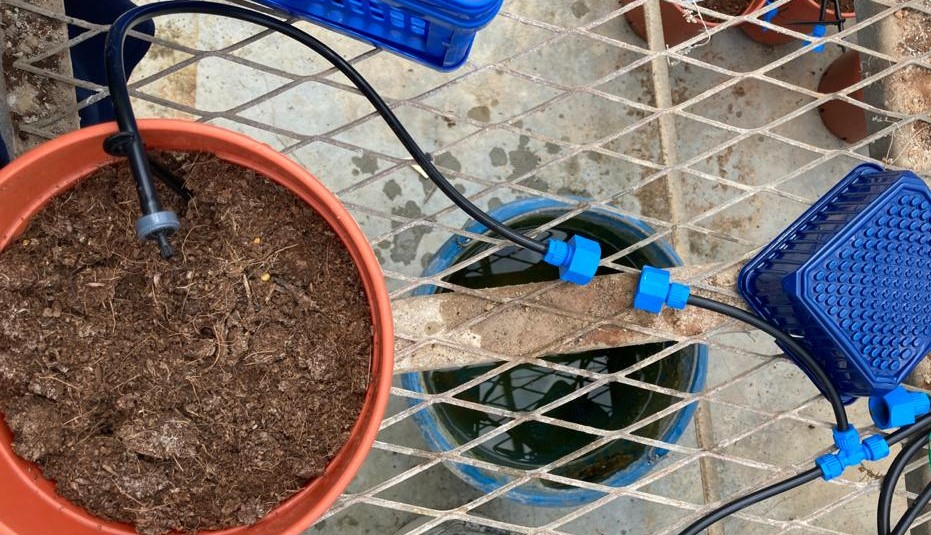

__* Tears, sweat, and cream for burns..__

## Setup ESP32 on Arduino IDE

For this project we used Arduino IDE for programming our ESP32 module. 

If you've never done this before, first you'll have to add ESP32 board support to the Arduino software

[Follow this guide](https://randomnerdtutorials.com/installing-the-esp32-board-in-arduino-ide-windows-instructions/)
(Don’t install the new 2.0 beta Arduino IDE!)

### Adding the libraries

The following libraries will be used for our Arduino code. Download the following libraries:

Thingspeak library: https://github.com/mathworks/thingspeak-arduino <br>
HX711 library: https://github.com/bogde/HX711 <br>
Soil Moisture Sensor library: https://github.com/tinovi/i2cArduino <br>
Navigate to Sketch-> Include Library -> Manage Libraries... on your Arduino IDE and add the libraries above.

## Connecting the components

scetch of the connections:

(Tips for organizing the connections : always use black jumper as ground(GND) and red jumper as voltage (V In)) 

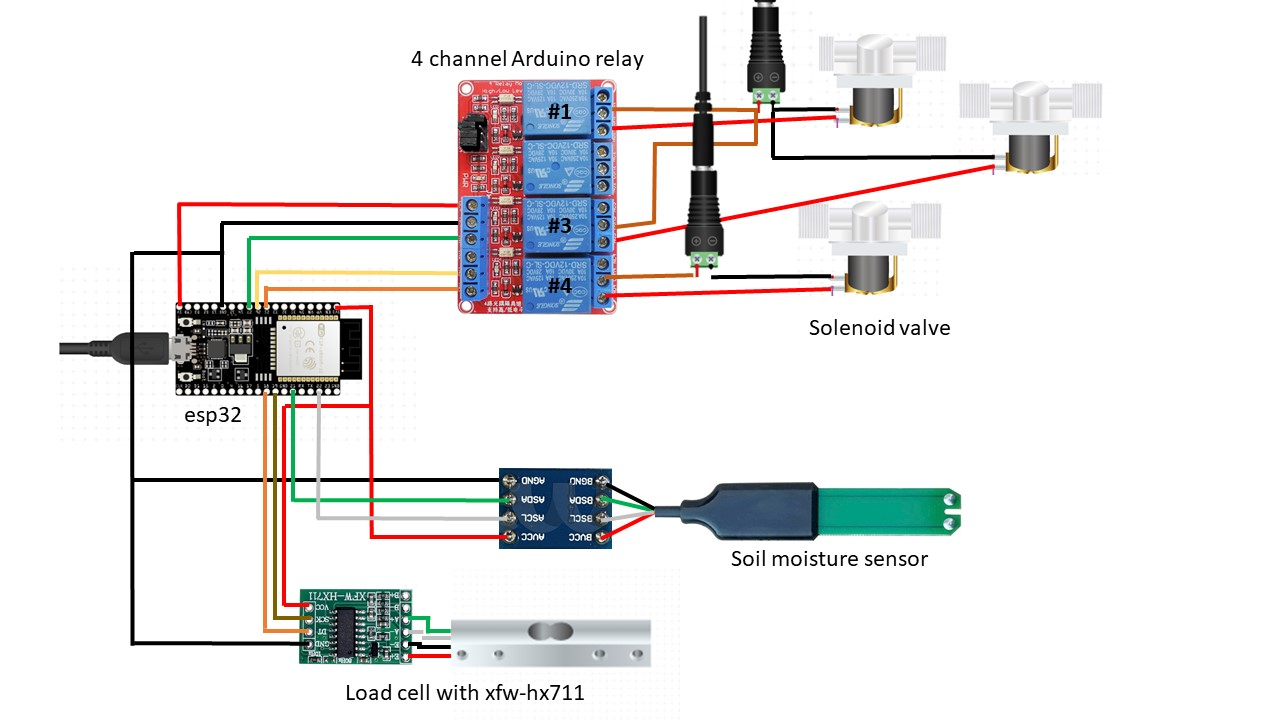

Before running all the functions together try to see if every component works separately.

### Load cell (weight)

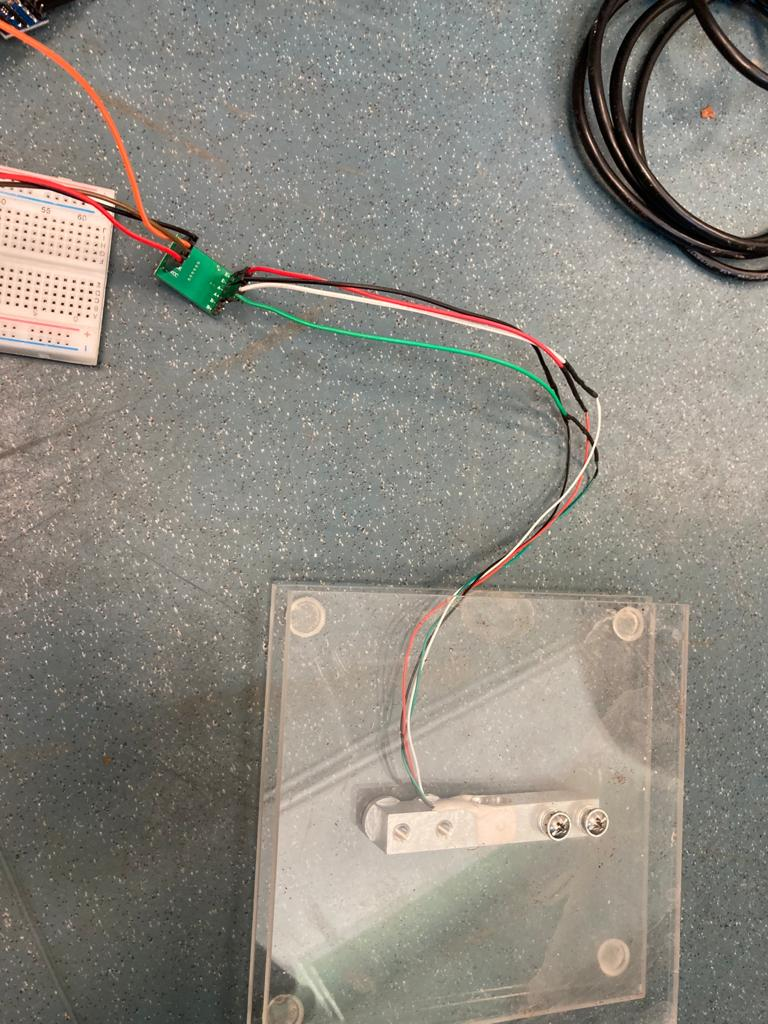

Use shrinking tube to solder the wires of the load cell..

In order to get valid values of weight by the scale, it has to be calibrated using known weight(as presented in the picture bellow),follow the next steps in order to create the "calibration function"
1. Create A Code which only measure the current weight and print it <br>
    a. BE AWERE THE VALUES Will be "wierd" <br>
    b. If the values are negative check your wires <br>
2. Place 2-3 Known Weight on the scale and take 5-8 printed Output <br>
    a. Make sure the has 2-5 second delay  between readings <br>
    b. Make sure the weight is above/bellow the min/max reading <br>
    c. copy the outputs to excel and create a linear (X-Known Weight, Y-Scale reading) function               which will be your "Factor" <br>
    d. With your "Factor" Value modify the reading of the sclae to the normal reading <br>
    e. Check severel (Other) known weights in order to check the vailidy of the "factor" <br>
    f. If values are still not normal check 1.b or repit section 2. <br>

![cal](https://d2zofuu73zurgl.cloudfront.net/osefprati/cloned-images/129881/005/005.jpg)
look at [this guide](https://www.instructables.com/How-to-Interface-HX711-Balance-Module-With-Load-Ce/)

### Soil Moisture Sensor

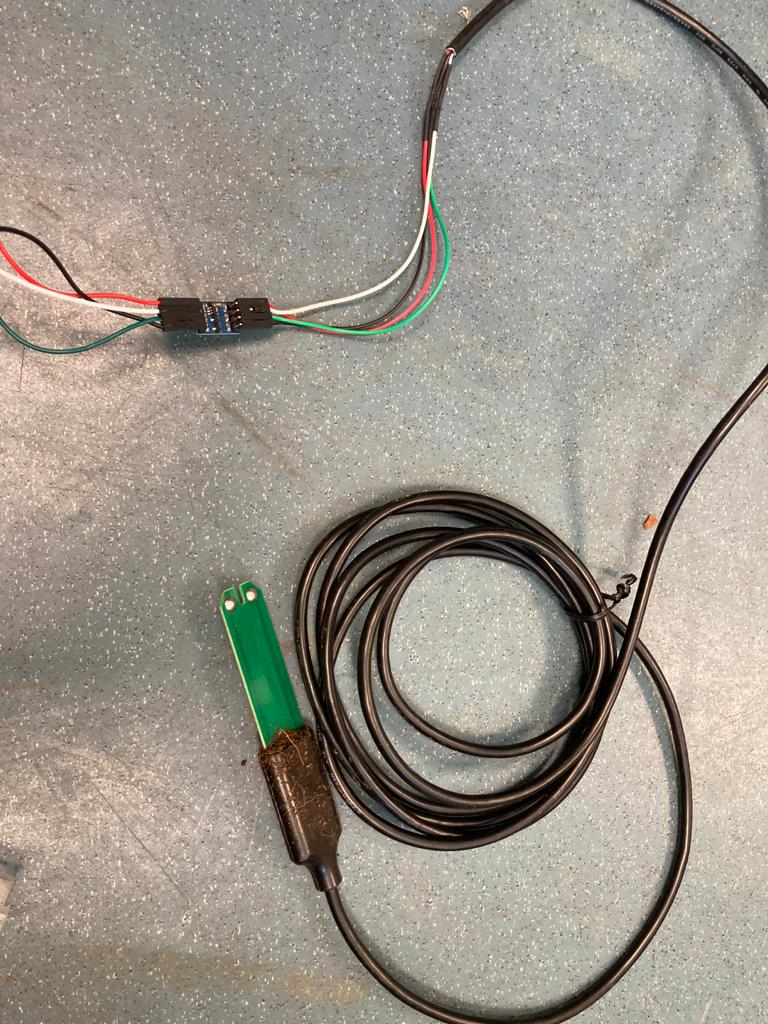

soil moisture [guide](https://tinovi.com/wp-content/uploads/2019/03/PM-WCS-3-I2C.pdf)

This Sensor is almost "Plug and Play" just donwload I2C library and follow the instruction in the guide + Source code

We decided how to irrigate after we checke the soil VWC(%) at "field Capacity" and set the system
to stay in at least 70%.

### Solenoid valve

**We suggest to have another person in the room when using high voltage !!!!!**

first step is to understan how the Relay workes..
watch [this videio](https://www.youtube.com/watch?app=desktop&v=sWiflR1LzV8)

Use the screwdriver to conect the cables (if needed snip them a bit so it stays more)
as in the scetch.

Start the code (SetUp) with closing commend on relay(LOW) in order to avoid unwanted irrigation

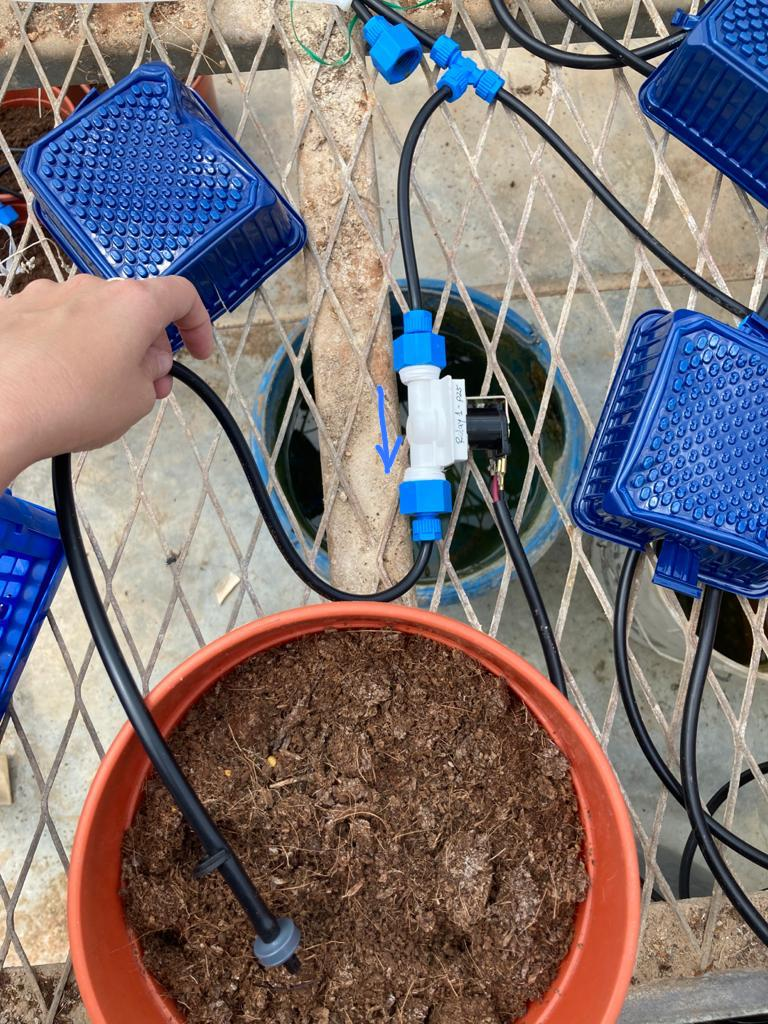

when installing the valve: 
Be aware of the flow direction of the water (the correct flow direction is indicated by an arrow on the valve body).
On the Pipe Connecting pot Teflon Plumbing seal tape - to prevet leeking.

## Thingspeak Setup

There are several cloud data storage services for use with the internet of things. They allow communication between your microcontroller and the network, allowing you to send and receive all kinds of data.

Thingspeak (https://thingspeak.com/.) is another such service. It is really easy to use, allowed monitoring of various information.

To creat your account and channel [Follow this guide](https://hackaday.io/project/167346/instructions)

![thingspeak](https://cdn.hackaday.io/images/5824811566829122615.jpg)

## Arduino Code

![arduino code](https://cdn.hackaday.io/images/8103991566829154053.jpg)

The code **idea** is as follows: ([you can see full code on our github](https://github.com/shani-g/agrotech/blob/main/Arduino%20code.ino)) 

* Codes begins with including the packages we will use and defining the input and output pin names.
* Then we have the __void setup():__ at this stage we set the Wi-Fi,the uploading to Thingspeak . amd genreal Pre-setting for the sensors, this code will run once when we plug in our device.
* Next step we define the **functions** that will be in the void loop (that will run continuously when the device is connected to electricity.
    * Scale irrigation function: that will get information from the scale with the calibration facture we found. If the weight is smaller than a minimum weight we set at the beginning (of the pot full irrigated)- than open irrigation. We increased the minimum weight in 5% each day due to plant growth.
    * Soil Prob irrigation function: that will get information from the soil prob. And will irrigate when soil water content is under a threshold we defined.
    * Time irrigation function: we want to irrigate once a day at the same time -than if the time is the one we called the valve would open. 
* At __void loop()__ we call the functions , and upload values to Thingspeak at 15 minute interval.



## Uploading code to esp

1. Make sure you are using the right board (NodeMCU-32S)
2. Hold IOO button 
3. Click on upload in Arduino IDE
        you should see:
        Connecting........_____...   
4. Let go of IOO button
        you should see:
        many fast messages in orange

## Is it working?

* Do you have a wireless network?
* Did you install all packages?
* are the valves connected to electrical power?
* is everything connected properly?
* are you in a looky day?
* is the water open?

If the answer to all of these questions is yes, then  it should work.


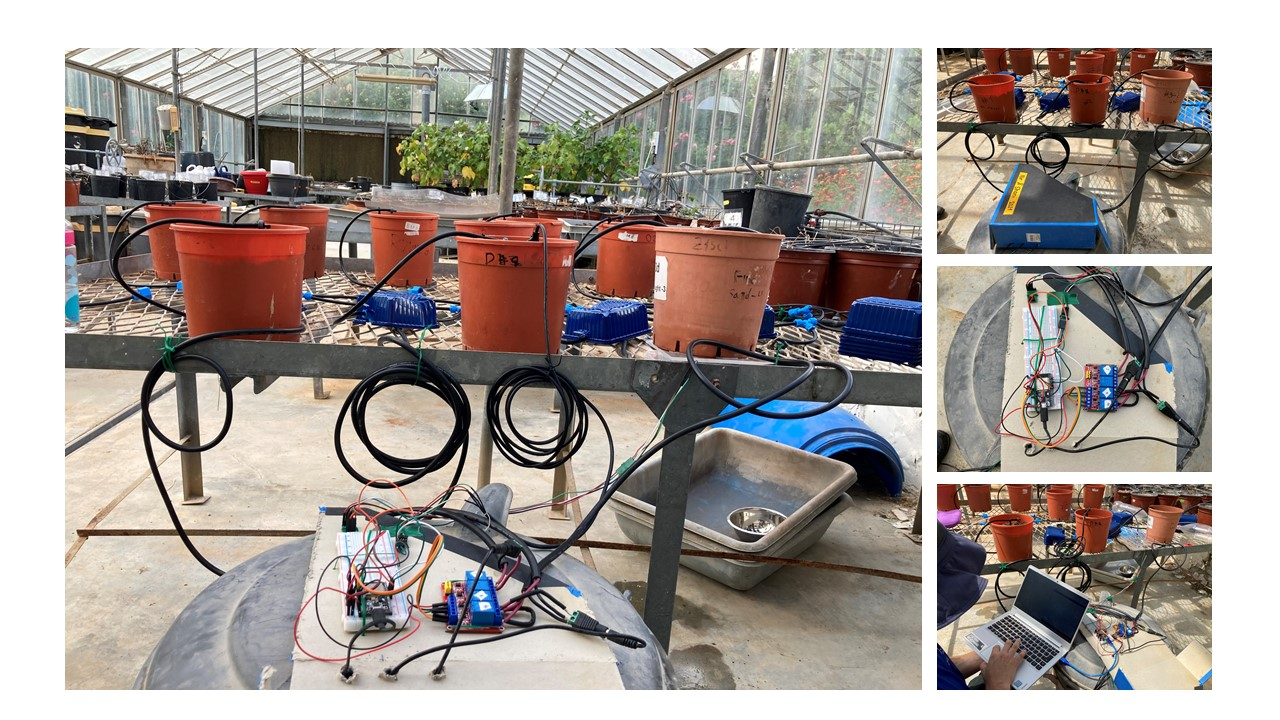

To write this jupyter guid we used:
    [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet)

We Hope you enjoy reading the manual for our automatic irrgatinon system.
if you have any difficultice feel free to contect us via mail :-)

**"Things are only impossible until they're not." -- Captain Jean-Luc Picard**